<a href="https://colab.research.google.com/github/GURACHAALI/Linear_Regression/blob/main/assg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploader=files.upload()

Saving train_w.csv to train_w.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df=pd.read_csv('train_w.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data = df[['GrLivArea', 'BedroomAbvGr', 'YearBuilt', 'YrSold', 'SalePrice','age']].copy()

In [11]:
data = data.rename(columns={
    'GrLivArea': 'Size_sqft',
    'BedroomAbvGr': 'Bedrooms'
})

In [12]:
data = data[['Size_sqft', 'Bedrooms', 'age', 'SalePrice']]

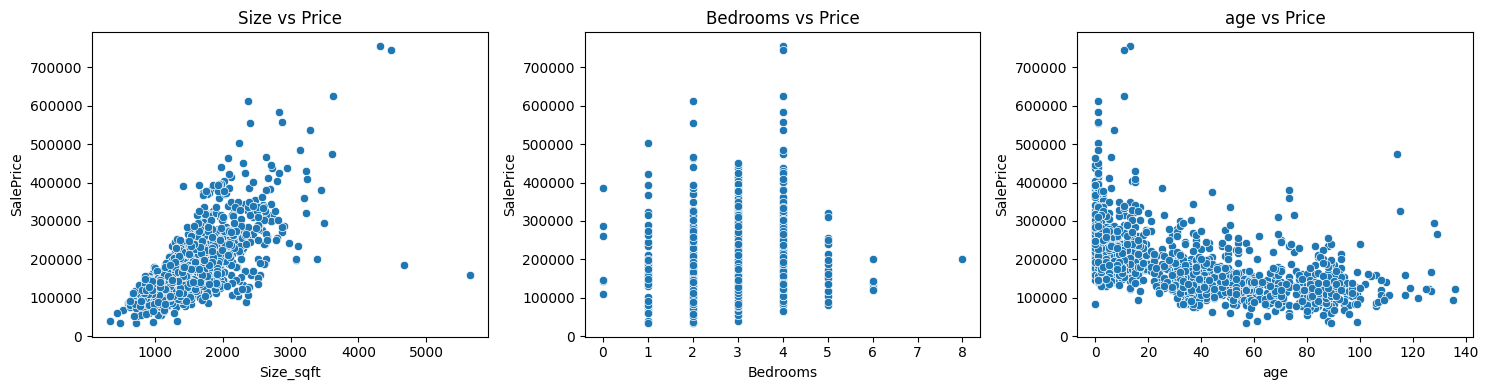

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1); sns.scatterplot(data=data, x='Size_sqft', y='SalePrice'); plt.title('Size vs Price')
plt.subplot(1,3,2); sns.scatterplot(data=data, x='Bedrooms', y='SalePrice'); plt.title('Bedrooms vs Price')
plt.subplot(1,3,3); sns.scatterplot(data=data, x='age', y='SalePrice'); plt.title('age vs Price')
plt.tight_layout(); plt.show()

In [16]:
X = data[['Size_sqft', 'Bedrooms', 'age']]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Final Equation
print(f"SalePrice = {model.intercept_:.0f} + {model.coef_[0]:.0f}×Size_sqft + {model.coef_[1]:.0f}×Bedrooms + {model.coef_[2]:.0f}×age")

SalePrice = 103484 + 106×Size_sqft + -17186×Bedrooms + -946×age


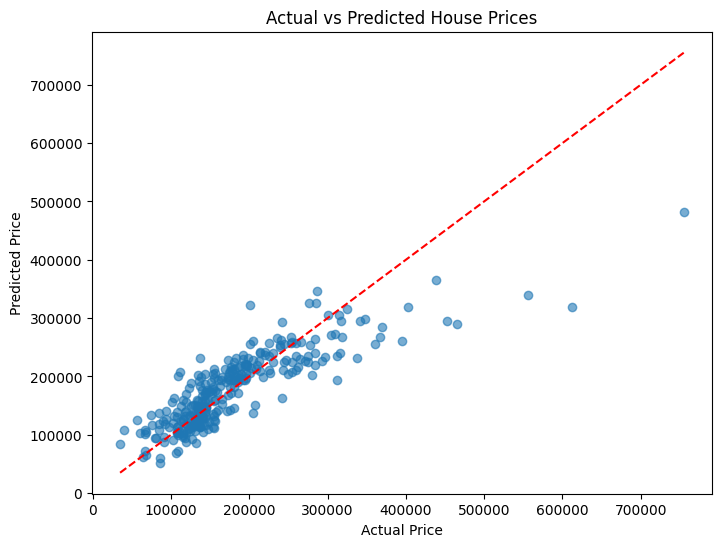

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, model.predict(X_test), alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price'); plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [18]:
new_house = [[2000, 3, 10]]  # 2000 sqft, 3 bedrooms, 10 years old
predicted_price = model.predict(new_house)[0]
print(f"Predicted Price: ${predicted_price:,.0f}")

Predicted Price: $255,251


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
